# 전세계 음주 데이터 분석하기
 - 통계데이타를 분석하는 전반적인 흐름을 파악 하고 각 단계별 사용하는
 - 도구들이 어떤 의미를 가지고 있는지 알아보는 것이 본 실습의 목적입니다


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


# 숫자로 구성된 필드값을 확인 한다

In [6]:
drinks.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


## 평균값과 중위값을 비교 한다.
 - wine_servings 평균값과 중위값이 차이가 많다
 - beer_servings 의 높은 표준편차는 각데이타가 평균에서 많이 벗어난 분포를 가진다는 의미입니다.
 - 와인 소비량에서는 평균과 중앙값의 차이가 매우 큽니다. 평균이 중앙값보다 훨씬 높으며, 이는 와인 소비량 데이터에서 상대적으로 높은 값을 가진 이상치나 극단적인 값들이 평균을 크게 올리고 있음을 나타냅니다.
                    

In [7]:
drinks.describe()  

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 탐색과 시각화 단계

    - 여러 항목간의 상관계수 구하기
    - 맥주(beer_servings)와 총 알코올 소비량(total_litres_of_pure_alcohol ):
         0.835839 (강한 양의 상관관계)

In [8]:
# 피처간의 상관계수 행렬을 구합니다.
# cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
# corr = drinks[cols].corr(method = 'pearson')
# print(corr)

#위 코드를 단순하게 만들면(숫자인 항목만 따로 구해서 상관계수 구하기)

num_cols = drinks.select_dtypes(include=[np.number])
corr = num_cols.corr()
print(corr)


                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


# corr 행렬 히트맵을 시각화합니다.

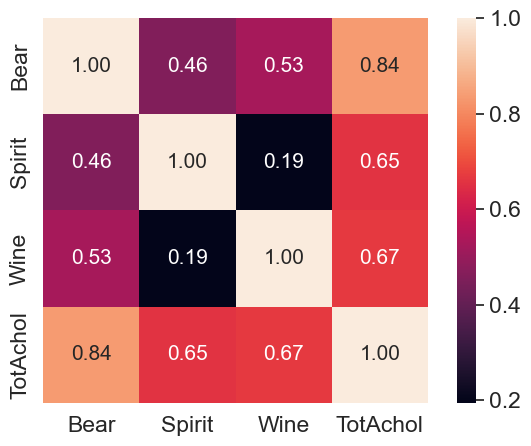

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm



# corr 행렬 히트맵을 시각화합니다.
cols_view = ['Bear', 'Spirit', 'Wine', 'TotAchol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

# 시각화 라이브러리를 이용한 항목간 scatter plot을 출력합니다.
    - 대각선 상의 그래프: 각 변수의 분포를 나타내는 히스토그램입니다. 예를 들어, 맥주 소비량은 대부분의 국가에서 낮은 소비량을 보이지만, 몇몇 국가에서는 매우 높은 소비량을 보이고 있음을 알 수 있습니다. 순수 알코올 총 소비량도 마찬가지의 분포를 보입니다.

    - 대각선을 기준으로 아래와 위의 그래프: 두 변수 간의 관계를 나타내는 산점도입니다. 각 점은 하나의 국가를 나타내며, x축과 y축에 해당하는 변수의 값에 따라 위치합니다.

    예를 들어, 'beer_servings'와 'total_litres_of_pure_alcohol' 사이의 그래프를 보면, 두 변수 간에 양의 상관관계가 있음을 알 수 있습니다. 이는 맥주 소비량이 많은 국가가 총 알코올 소비량도 높다는 것을 의미합니다.
    'spirit_servings'와 'wine_servings' 사이의 관계는 상대적으로 덜 뚜렷합니다. 이는 증류주 소비량과 와인 소비량이 각기 다른 패턴을 보이고 있다는 것을 나타낼 수 있습니다.

    - 산점도의 분포: 각 산점도의 점들이 어떻게 퍼져 있는지를 통해 변수 간의 관계의 강도와 형태를 파악할 수 있습니다. 점들이 직선에 가깝게 배치되어 있으면 강한 선형 관계를, 넓게 퍼져 있으면 약한 관계를 나타냅니다.

    이 pairplot은 데이터에 대한 전반적인 이해를 돕고, 어떤 변수들이 서로 강하게 연관되어 있는지를 빠르게 식별할 수 있도록 합니다. 또한, 이상치나 특정 패턴을 식별하는 데에도 유용합니다. 예를 들어, 총 알코올 소비량이 높은 국가들은 맥주, 증류주, 와인 소비량도 높은 경향을 보이는데, 이는 알코올 소비의 전반적인 경향을 나타낼 수 있습니다. 반면에 맥주와 증류주 소비량 사이 또는 증류주와 와인 소비량 사이에는 상대적으로 덜 뚜렷한 상관관계가 보이는 것으로 추측됩니다.

    이런 시각적 분석은 통계적 분석을 보완하고, 어떤 변수들이 더 자세한 분석을 위해 추가적인 조사를 필요로 하는지 결정하는 데 도움이 됩니다.

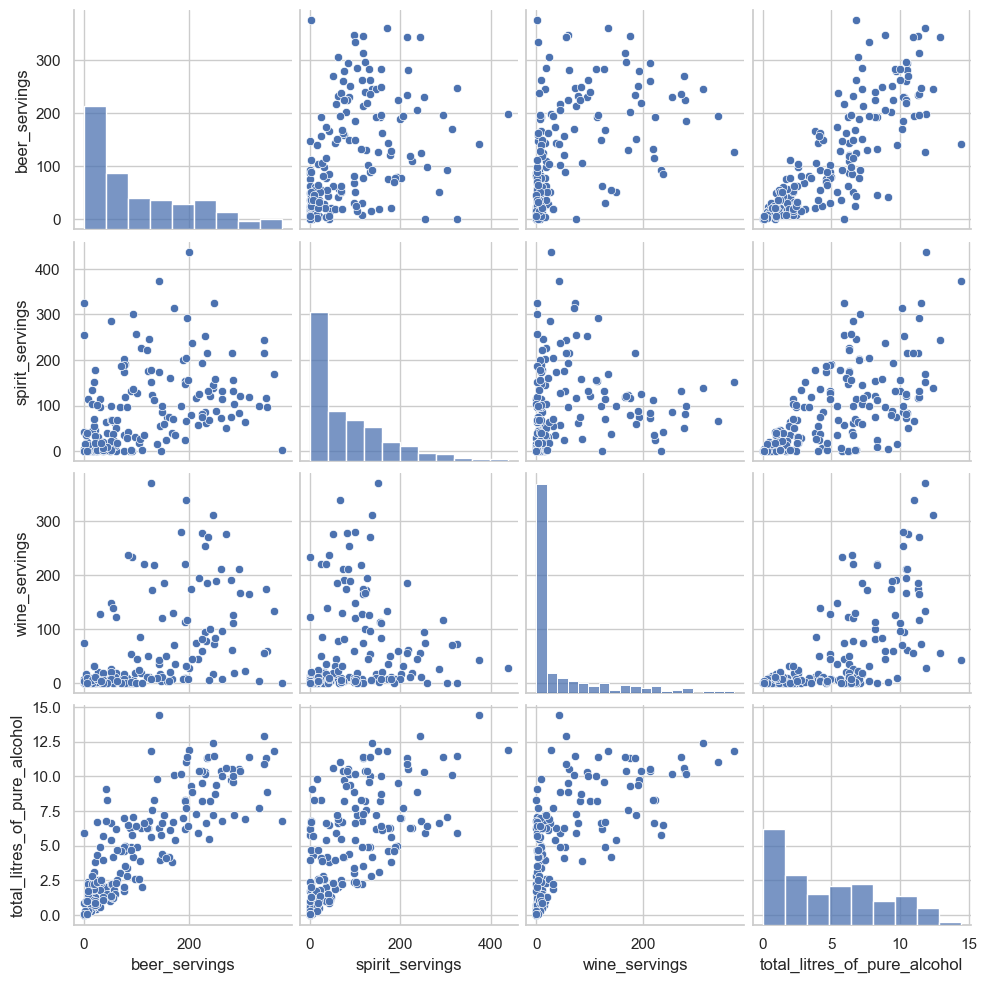

In [10]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

[전처리 과정중 결측데이타 처리는 필수 적인 과정임]

Continent 에 결측Data가 존재함 nan 을 'OT'로 처리함

In [19]:
print(drinks.isnull().sum())
print('='*40)
print(drinks.dtypes)
print('='*40)
print(drinks['continent'].unique())
print('='*40)
drinks['continent'] = drinks['continent'].fillna('OT')
print('='*40)
print(drinks['continent'].unique())


country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object
['AS' 'EU' 'AF' nan 'SA' 'OC']
['AS' 'EU' 'AF' 'OT' 'SA' 'OC']


In [23]:
display(drinks['continent'].value_counts().index.tolist())
display(drinks['continent'].value_counts().values.tolist())

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

[53, 45, 44, 23, 16, 12]

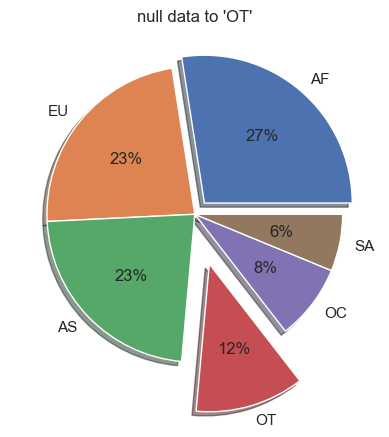

In [27]:
# 파이차트 시각화

labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0.1, 0, 0, 0.35, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()